In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.0.0


In [0]:
# downLoad the dataset 
digits_mnist = keras.datasets.mnist
# This breaks the dataset from a tuple into arrays we can actually use
(x_train, y_train), (x_test, y_test) = digits_mnist.load_data()

In [0]:
print(x_train.shape)
print(y_train[0])

(60000, 28, 28)
5


In [0]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

5


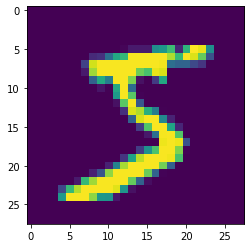

In [0]:
print(y_train[0])
plt.imshow(x_train[0])
plt.show()

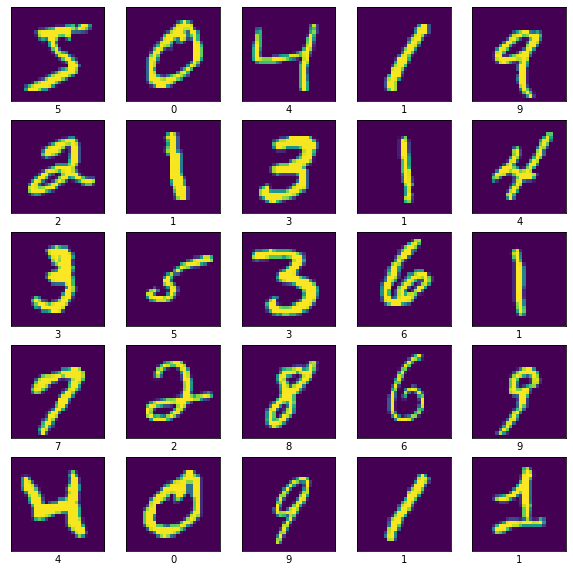

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i])
plt.show()

In [0]:
model = keras.models.Sequential()
#flatten the image into vector
model.add(keras.layers.Flatten(input_shape=(28,28)))
#hidden dense layer
model.add(keras.layers.Dense(128, activation='relu'))
#output layer
model.add(keras.layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(x_train/255.0,y_train,epochs = 10) 

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2590 - accuracy: 0.9258
Epoch 2/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1178 - accuracy: 0.9652
Epoch 3/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0808 - accuracy: 0.9758
Epoch 4/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0589 - accuracy: 0.9819
Epoch 5/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0462 - accuracy: 0.9859
Epoch 6/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0363 - accuracy: 0.9885
Epoch 7/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0289 - accuracy: 0.9907
Epoch 8/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0241 - accuracy: 0.9929
Epoch 9/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0185 - accuracy: 0.9944
Epoch 10/10
60

In [0]:
test_loss, test_acc = model.evaluate(x_test/255.0,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.0427 - accuracy: 0.9773

Test accuracy: 0.9773


## <span style="color:red">That should be the end of the assignment</span>
I dont know if you want the following code 
The first is my attempt at conv nets to try to do the project.
It had dissapointing results, as it was much slower (I installed tensorflow-gpu so thats why its only 2x slower lol). 
You can show them history and summary I guess thats why its included

In [0]:
import tensorflow.keras.layers as KL

In [0]:
input_layer = KL.Input(shape = (28,28,1))
x = KL.Conv2D(10,(3,3),activation='relu')(input_layer)
x = KL.BatchNormalization()(x)
x = KL.Conv2D(3,(1,1))(x) # I think linear is the best
x = KL.BatchNormalization()(x)
x = KL.Conv2D(10,(3,3),activation='relu')(x)
x = KL.BatchNormalization()(x)
x = KL.Flatten()(x)
x = KL.Dense(10, activation='softmax',name = "PredictionLayer")(x)
modelv2 = keras.models.Model(inputs = input_layer,outputs = x)
modelv2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [0]:
modelv2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 3)         33        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 3)         12        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 10)        280       
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 10)        40  

In [0]:
modelv2.fit(x_train.reshape(x_train.shape[0], 28, 28, 1)/255.0,y_train,epochs = 10) 

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 140us/sample - loss: 0.1663 - accuracy: 0.9526
Epoch 2/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0669 - accuracy: 0.9801
Epoch 3/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.0439 - accuracy: 0.9861
Epoch 4/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.0312 - accuracy: 0.9895
Epoch 5/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.0249 - accuracy: 0.9912
Epoch 6/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0198 - accuracy: 0.9931
Epoch 7/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0148 - accuracy: 0.9949
Epoch 8/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0139 - accuracy: 0.9952
Epoch 9/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0096 - accuracy: 0.9966
Epoch

In [0]:
test_loss, test_acc = modelv2.evaluate(x_test.reshape(x_test.shape[0], 28, 28, 1)/255.0,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.0549 - accuracy: 0.9764

Test accuracy: 0.9764


In [0]:
model = keras.models.Sequential()
#flatten the image into vector
model.add(keras.layers.Flatten(input_shape=(28,28)))
#hidden dense layer
model.add(keras.layers.Dense(128, activation='relu'))
#output layer
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(x_train/255.0,y_train,epochs = 10) 

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2562 - accuracy: 0.9265s - l
Epoch 2/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1111 - accuracy: 0.9670
Epoch 3/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0760 - accuracy: 0.9775
Epoch 4/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0585 - accuracy: 0.9819
Epoch 5/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0449 - accuracy: 0.9863
Epoch 6/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0345 - accuracy: 0.9892
Epoch 7/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0278 - accuracy: 0.9916
Epoch 8/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0225 - accuracy: 0.9934
Epoch 9/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0176 - accuracy: 0.9949
Epoch 10/

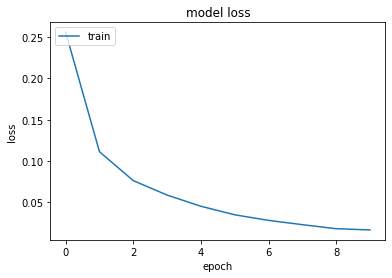

In [0]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()